-------------------------------
#### Aim : understand the tuning process of a Decision Tree
---------------------------

In [1]:
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# import the ML algorithm
from sklearn.tree import DecisionTreeClassifier

In [2]:
location = "https://github.com/gridflowai/gridflowAI-datasets-icons/raw/master/AI-DATASETS/01-MISC/iris.csv"

In [3]:
# load the training data 
df_iris = pd.read_csv(location)
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# copy the predictor variables into X and responses in y
X = df_iris[['sepal_length','sepal_width', 'petal_length', 'petal_width']]
y = df_iris['Class']

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
# split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)

In [7]:
clf = DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_train, y_train)

In [10]:
#!pip install graphviz

In [11]:
import graphviz 
from sklearn.tree import export_graphviz

In [12]:
feature_names = df_iris.drop('Class' , 1).columns
class_names   = y.unique()

C:\Users\bhupe\AppData\Local\Temp\ipykernel_7444\4232951571.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  feature_names = df_iris.drop('Class' , 1).columns


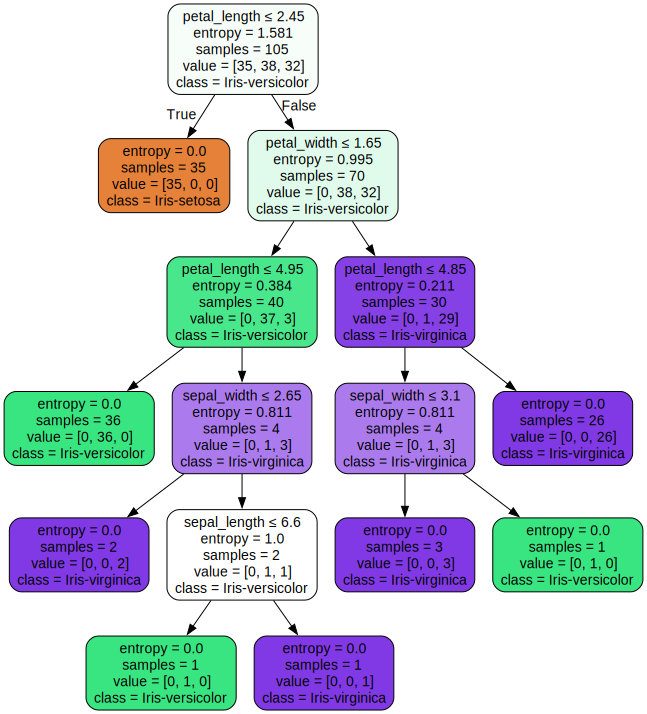

In [13]:
dot_data = export_graphviz(clf, 
                            out_file=None, 
                            feature_names=feature_names,  
                            class_names=class_names,  
                            filled=True, 
                            rounded=True,  
                            special_characters=True)  

graph = graphviz.Source(dot_data)  

graph.render(r"D:\trees\iris") 
graph 

#### feaure importances

In [14]:
clf.feature_importances_

array([0.01204459, 0.02704146, 0.67226027, 0.28865367])

In [15]:
clf.feature_names_in_

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
      dtype=object)

#### Tuning of decision trees

##### 1. max_depth

The maximum depth of the tree. 

- If None, then nodes are expanded until all leaves are pure or until all leaves contain less than `min_samples_split` samples.

In [14]:
from sklearn import metrics

In [15]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [16]:
max_depths = [ 1,2,3,4,5,6,7]

In [17]:
train_acc = []
test_acc  = []

# for each value of depth (starting with 1 ...2...3...4. ending at 32)
for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    
    dt.fit(X_train, y_train)    
    
    # check the model performance using the trainin samples
    train_pred = dt.predict(X_train)
    
    acc = metrics.accuracy_score(y_train, train_pred)
    
    train_acc.append(acc)
    
    # check the model performance using the testing samples
    test_pred = dt.predict(X_test)
    
    acc = metrics.accuracy_score(y_test, test_pred)
    
    test_acc.append(acc)

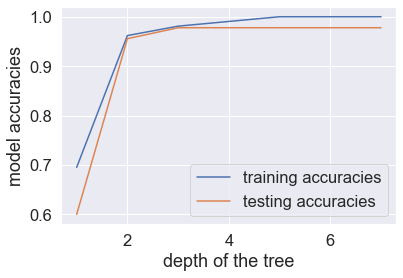

In [18]:
plt.plot(max_depths, train_acc, label='training accuracies')
plt.plot(max_depths, test_acc,  label='testing accuracies')
plt.xlabel('depth of the tree')
plt.ylabel('model accuracies')
           
plt.legend();

**Observations**
1. accuracies are high when depth of tree is in the range of 2 to 5/6

let us save all the models in html form so we can compare

In [19]:
# for each value of depth (starting with 1 ...2...3...4. ending at 32)
for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    
    dt.fit(X_train, y_train)    
    
    dot_data = export_graphviz(dt, 
                                out_file=None, 
                                feature_names=feature_names,  
                                class_names=class_names,  
                                filled=True, 
                                rounded=True,  
                                special_characters=True)  

    graph = graphviz.Source(dot_data)  
    
    tree_name = r"D:\trees\iris"+"_"+str(max_depth)

    graph.render(tree_name) 


#### min_samples_split

The minimum number of samples required to split an internal node:

- If int, then consider `min_samples_split` as the minimum number.

- If float, then `min_samples_split` is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.

In [20]:
min_samples_splits = np.linspace(0.01, 1.0, 20, endpoint=True)

In [21]:
min_samples_splits

array([0.01      , 0.06210526, 0.11421053, 0.16631579, 0.21842105,
       0.27052632, 0.32263158, 0.37473684, 0.42684211, 0.47894737,
       0.53105263, 0.58315789, 0.63526316, 0.68736842, 0.73947368,
       0.79157895, 0.84368421, 0.89578947, 0.94789474, 1.        ])

In [22]:
train_acc = []
test_acc  = []

# for each value of depth (starting with 1 ...2...3...4. ending at 32)
for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
    
    dt.fit(X_train, y_train)    
    
    # check the model performance using the trainin samples
    train_pred = dt.predict(X_train)
    
    acc = metrics.accuracy_score(y_train, train_pred)
    
    train_acc.append(acc)
    
    # check the model performance using the testing samples
    test_pred = dt.predict(X_test)
    
    acc = metrics.accuracy_score(y_test, test_pred)
    
    test_acc.append(acc)

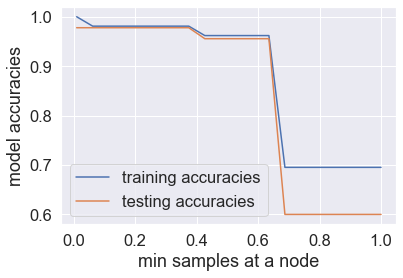

In [23]:
plt.plot(min_samples_splits, train_acc, label='training accuracies')
plt.plot(min_samples_splits, test_acc,  label='testing accuracies')
plt.xlabel('min samples at a node')
plt.ylabel('model accuracies')
           
plt.legend();

**Observation :**

    1. accuracies are high when min_samples_split is in the range of 5% to 50%

##### 3. `min_samples_leaf` int or float, default=1

The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

If int, then consider min_samples_leaf as the minimum number.

If float, then min_samples_leaf is a fraction and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

In [24]:
min_samples_leafs = np.arange(5, 50)

In [25]:
min_samples_leafs

array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [26]:
train_acc = []
test_acc  = []

# for each value of depth (starting with 1 ...2...3...4. ending at 32)
for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    
    dt.fit(X_train, y_train)    
    
    # check the model performance using the trainin samples
    train_pred = dt.predict(X_train)
    
    acc = metrics.accuracy_score(y_train, train_pred)
    
    train_acc.append(acc)
    
    # check the model performance using the testing samples
    test_pred = dt.predict(X_test)
    
    acc = metrics.accuracy_score(y_test, test_pred)
    
    test_acc.append(acc)

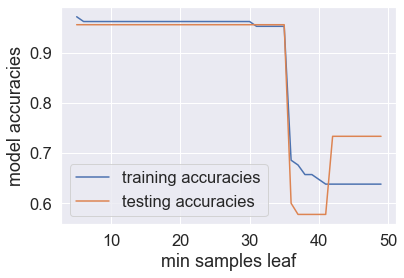

In [27]:
plt.plot(min_samples_leafs, train_acc, label='training accuracies')
plt.plot(min_samples_leafs, test_acc,  label='testing accuracies')
plt.xlabel('min samples leaf')
plt.ylabel('model accuracies')
           
plt.legend();

**Observation**

- good range for min samples leaf is 5 to 30

#### Find exact optimal settings for each of the parameters

- max_depths [2 to 6]
- min_sample_split [5% to 50%]
- min_samples_leaf [5 to 30]

In [29]:
# define all the parameters
max_depths        = [2,3,4,5,6,7,8]
min_samples_split = np.linspace(.05, .50, 15)
min_samples_leaf  = np.arange(5, 30)

In [30]:
# define the parameters dict
parameters = dict(
                max_depth         = max_depths,
                min_samples_split = min_samples_split,
                min_samples_leaf  = min_samples_leaf
            )

print(parameters)

{'max_depth': [2, 3, 4, 5, 6, 7, 8], 'min_samples_split': array([0.05      , 0.08214286, 0.11428571, 0.14642857, 0.17857143,
       0.21071429, 0.24285714, 0.275     , 0.30714286, 0.33928571,
       0.37142857, 0.40357143, 0.43571429, 0.46785714, 0.5       ]), 'min_samples_leaf': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29])}


In [31]:
7 * 15 * 25

2625

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
clf = DecisionTreeClassifier()

In [34]:
# instantiate the grid search CV
grid = GridSearchCV(estimator = clf, 
                   param_grid = parameters, 
                   scoring    = 'accuracy',
                   cv         = 5,
                   verbose    = 1 )

In [35]:
# fit the data to the grid object
grid.fit(X, y)

Fitting 5 folds for each of 2625 candidates, totalling 13125 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29]),
                         'min_samples_split': array([0.05      , 0.08214286, 0.11428571, 0.14642857, 0.17857143,
       0.21071429, 0.24285714, 0.275     , 0.30714286, 0.33928571,
       0.37142857, 0.40357143, 0.43571429, 0.46785714, 0.5       ])},
             scoring='accuracy', verbose=1)

In [37]:
print('Best params : \n', grid.best_params_)


Best params : 
 {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 0.05}


#### let us try Grid search on Auto.csv dataset

In [38]:
location = r"D:\MYLEARN\datasets\Auto.csv"

In [39]:
# load the training data from glass data set
df_training = pd.read_csv(location)
df_training

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [40]:
df_training.drop(['name'], axis=1, inplace=True)

In [41]:
mask = df_training.horsepower == '?'

In [42]:
df_training.loc[mask, 'horsepower'] = '999999'

In [43]:
df_training['horsepower'] = df_training['horsepower'].astype('float64')

In [44]:
df_training.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
year              int64
origin            int64
dtype: object

In [45]:
df_training.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,12697.599496,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,111645.033312,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,76.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,95.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,130.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,999999.000000,5140.000000,24.800000,82.000000,3.000000


In [46]:
train = df_training[df_training.horsepower  < 999999].copy()            # valid data
test  = df_training[df_training.horsepower == 999999].copy()            # rows with ? in the horsepower col (999999)

In [47]:
X_train = train.drop(['year', 'horsepower'], axis= 1)
y_train = train.horsepower

X_test = test.drop(['year', 'horsepower'], axis= 1)
y_test = test.horsepower

In [48]:
from sklearn.neighbors import KNeighborsRegressor

In [49]:
model_to_predict_missing_value = KNeighborsRegressor(n_neighbors= 5,
                                                     weights    = 'uniform'
                                                    )

model_to_predict_missing_value.fit(X_train, y_train)

y_pred = model_to_predict_missing_value.predict(X_test)

In [50]:
X_train['horsepower'] = y_train

In [51]:
X_test['horsepower'] = y_pred

In [52]:
X_merged = pd.concat([X_train, X_test], axis=0)

In [53]:
X_merged.describe()

,mpg,cylinders,displacement,weight,acceleration,origin,horsepower
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,1.574307,104.213602
std,7.825804,1.701577,104.379583,847.904119,2.749995,0.802549,38.393591
min,9.000000,3.000000,68.000000,1613.000000,8.000000,1.000000,46.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,1.000000,75.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,1.000000,93.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,2.000000,125.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,3.000000,230.000000


In [54]:
X_merged['origin'] = X_merged['origin'].astype('object')

In [55]:
X_merged_dummies = pd.get_dummies(X_merged, drop_first = True)

In [56]:
# create a Python list of feature names
feature_cols = ['mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'origin_2','origin_3']

# use the list to select a subset of the original DataFrame
X = X_merged_dummies[feature_cols]

# select a Series from the DataFrame
y = X_merged_dummies['horsepower']

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
# Splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)

In [59]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(277, 7)
(277,)
(120, 7)
(120,)


In [60]:
from sklearn.tree import DecisionTreeRegressor

In [61]:
model = DecisionTreeRegressor()

In [62]:
# instantiate the grid search CV
grid = GridSearchCV(estimator = model, 
                   param_grid = parameters, 
                   scoring    = 'neg_mean_squared_error',
                   cv         = 5,
                   verbose    = 1 )

In [63]:
# fit the data to the grid object
grid.fit(X, y)

Fitting 5 folds for each of 2625 candidates, totalling 13125 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29]),
                         'min_samples_split': array([0.05      , 0.08214286, 0.11428571, 0.14642857, 0.17857143,
       0.21071429, 0.24285714, 0.275     , 0.30714286, 0.33928571,
       0.37142857, 0.40357143, 0.43571429, 0.46785714, 0.5       ])},
             scoring='neg_mean_squared_error', verbose=1)

In [64]:
print('Best params : \n', grid.best_params_)

Best params : 
 {'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 0.05}


#### set a Dec tree model with the optimal settings 

In [65]:
model = DecisionTreeRegressor(max_depth= 6, min_samples_leaf= 5, min_samples_split= 0.05)

In [66]:
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, min_samples_leaf=5, min_samples_split=0.05)

#### Evaluation of the model

In [67]:
from sklearn import metrics

In [68]:
# Model evaluation results : Training
y_pred_train = model.predict(X_train)


print("Metrics for the training predictions")
print("------------------------------------")
print('Mean Abs Error   MAE    : ', metrics.mean_absolute_error(y_train, y_pred_train))
print('Mean Sq  Error MSE      : ', metrics.mean_squared_error( y_train, y_pred_train))
print('Root Mean Sq Error RMSE : ', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print('MAPE                    : ', np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100)
print('MPE                     : ', np.mean((y_train - y_pred_train) / y_train) * 100)
print('r2 value                : ', metrics.r2_score(y_train, y_pred_train))

print()

# Model evaluation results : Training
y_pred = model.predict(X_test)

print("Metrics for the test samples predictions")
print("------------------------------------")
print('Mean Abs Error   MAE    : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Sq  Error MSE      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Sq Error RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAPE                    : ', np.mean(np.abs((y_test - y_pred) / y_test)) * 100)
print('MPE                     : ', np.mean((y_test - y_pred) / y_test) * 100)
print('r2 value                : ', metrics.r2_score(y_test, y_pred))

Metrics for the training predictions
------------------------------------
Mean Abs Error   MAE    :  6.679109638856932
Mean Sq  Error MSE      :  83.51796803477309
Root Mean Sq Error RMSE :  9.13881655548316
MAPE                    :  6.6813044090573275
MPE                     :  -0.7279479668805016
r2 value                :  0.9408210387702262

Metrics for the test samples predictions
------------------------------------
Mean Abs Error   MAE    :  9.132409743034744
Mean Sq  Error MSE      :  171.1365170347859
Root Mean Sq Error RMSE :  13.081915648512105
MAPE                    :  9.276387491555262
MPE                     :  -2.7720233437708264
r2 value                :  0.8932206559770062
